In [1]:
from prophet import Prophet
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [2]:
df = yf.download(tickers='KO', start='2020-01-01', end='2024-06-14')

[*********************100%***********************]  1 of 1 completed


C:\Users\Wonyoung\AppData\Roaming\Python\Python310\site-packages\yfinance\utils.py:768: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [3]:
df = df.reset_index().rename(columns={'Date':'ds', 'Adj Close':'y'})

In [4]:
df

,ds,Open,High,Low,Close,y,Volume
0,2020-01-02,55.320000,55.430000,54.759998,54.990002,47.777241,11867700
1,2020-01-03,54.320000,54.990002,54.090000,54.689999,47.516594,11354500
2,2020-01-06,54.650002,54.910000,54.520000,54.669998,47.499218,14698300
3,2020-01-07,54.450001,54.599998,54.150002,54.250000,47.134304,9973900
4,2020-01-08,54.270000,54.639999,54.150002,54.349998,47.221180,10676000
...,...,...,...,...,...,...,...
1115,2024-06-07,64.089996,64.220001,63.810001,63.910000,63.417919,9523100
1116,2024-06-10,63.939999,63.990002,63.369999,63.590000,63.100384,15687100
1117,2024-06-11,63.590000,63.650002,63.070000,63.549999,63.060688,8396000
1118,2024-06-12,63.689999,63.689999,62.689999,62.880001,62.395851,9569600


<Axes: xlabel='ds'>

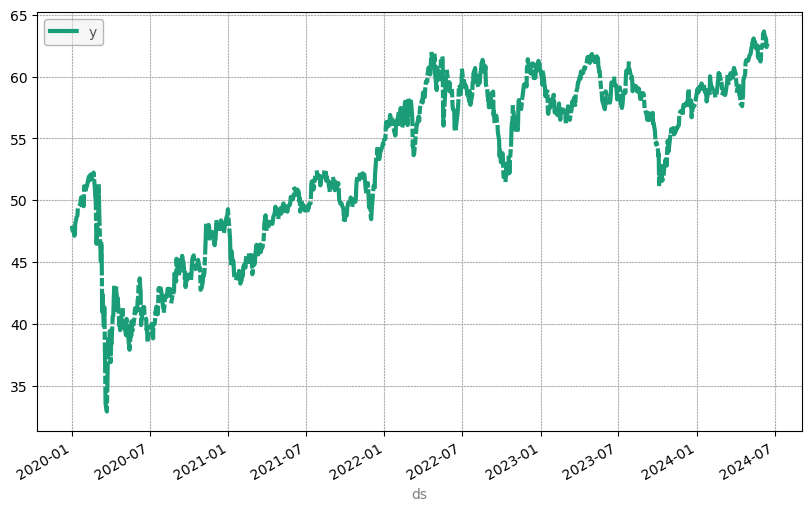

In [5]:
df.plot(x='ds', y='y')

In [6]:
train_df = df[:1000] # 훈련 셋
test_df = df # 테스트 셋

In [7]:
train_df

,ds,Open,High,Low,Close,y,Volume
0,2020-01-02,55.320000,55.430000,54.759998,54.990002,47.777241,11867700
1,2020-01-03,54.320000,54.990002,54.090000,54.689999,47.516594,11354500
2,2020-01-06,54.650002,54.910000,54.520000,54.669998,47.499218,14698300
3,2020-01-07,54.450001,54.599998,54.150002,54.250000,47.134304,9973900
4,2020-01-08,54.270000,54.639999,54.150002,54.349998,47.221180,10676000
...,...,...,...,...,...,...,...
995,2023-12-14,59.970001,60.040001,58.770000,59.040001,58.120525,22478300
996,2023-12-15,58.830002,59.169998,57.799999,58.599998,57.687378,65172300
997,2023-12-18,58.799999,59.490002,58.619999,59.020000,58.100842,16717700
998,2023-12-19,59.000000,59.200001,58.639999,58.830002,57.913799,14612200


In [8]:
prophet_train = Prophet(seasonality_mode = 'additive', # 계절성 모델
                 yearly_seasonality=26, # 연 계절성
                 weekly_seasonality=3, # 주 계절성
                 daily_seasonality=10, # 일 계절성
                 seasonality_prior_scale = 4, # 계절의 유연성을 제어하는 파라미터
                 changepoint_prior_scale=0.2, # 추세에 따라 데이터를 유연하게 반영하는 파라미터
                 holidays_prior_scale=3 # 휴일의 영향에 따라 유연성을 조절하는 파라미터
                  ).add_country_holidays(country_name='US') # 한국 휴일 추가

prophet_train.fit(train_df)

12:21:23 - cmdstanpy - INFO - Chain [1] start processing
12:21:25 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
prophet_test = Prophet(seasonality_mode = 'additive', # 계절성 모델
                 yearly_seasonality=26, # 연 계절성
                 weekly_seasonality=3, # 주 계절성
                 daily_seasonality=10, # 일 계절성
                 seasonality_prior_scale = 4, # 계절의 유연성을 제어하는 파라미터
                 changepoint_prior_scale=0.2, # 추세에 따라 데이터를 유연하게 반영하는 파라미터
                 holidays_prior_scale=3 # 휴일의 영향에 따라 유연성을 조절하는 파라미터
                  ).add_country_holidays(country_name='US') # 한국 휴일 추가

prophet_test.fit(test_df)

12:21:25 - cmdstanpy - INFO - Chain [1] start processing
12:21:26 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
future_train_data = prophet_train.make_future_dataframe(periods = 60, freq = 'd') #60일 데이터 예측
forecast_train_data = prophet_train.predict(future_train_data)
forecast_train_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1055,2024-02-14,57.815151,55.383142,61.253736
1056,2024-02-15,57.833858,55.345880,61.288875
1057,2024-02-16,57.938232,55.346546,61.729492
1058,2024-02-17,57.740357,55.278012,61.405532
1059,2024-02-18,57.755755,55.285427,61.589503


In [11]:
future_test_data = prophet_test.make_future_dataframe(periods = 60, freq = 'd') #60일 데이터 예측
forecast_test_data = prophet_test.predict(future_test_data)
forecast_test_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1175,2024-08-08,61.298989,59.127211,63.344342
1176,2024-08-09,61.338636,59.183383,63.438739
1177,2024-08-10,61.157408,58.928971,63.611660
1178,2024-08-11,61.245735,59.053563,63.484804
1179,2024-08-12,61.652829,59.369983,63.957379


d:\Anaconda3\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
d:\Anaconda3\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
d:\Anaconda3\lib\site-packages\prophet\plot.py:94: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


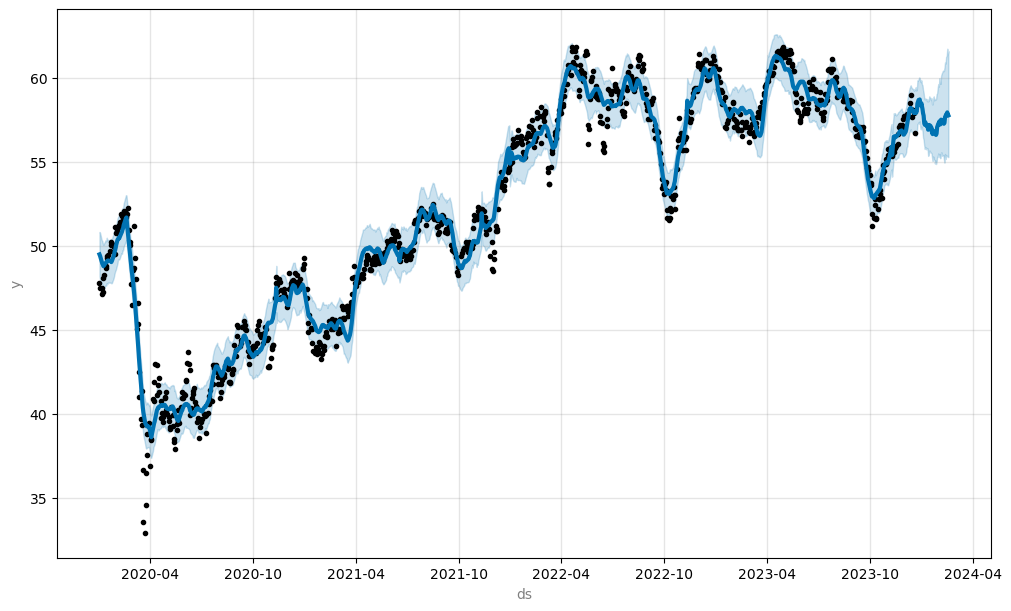

In [12]:
fig1 = prophet_train.plot(forecast_train_data)

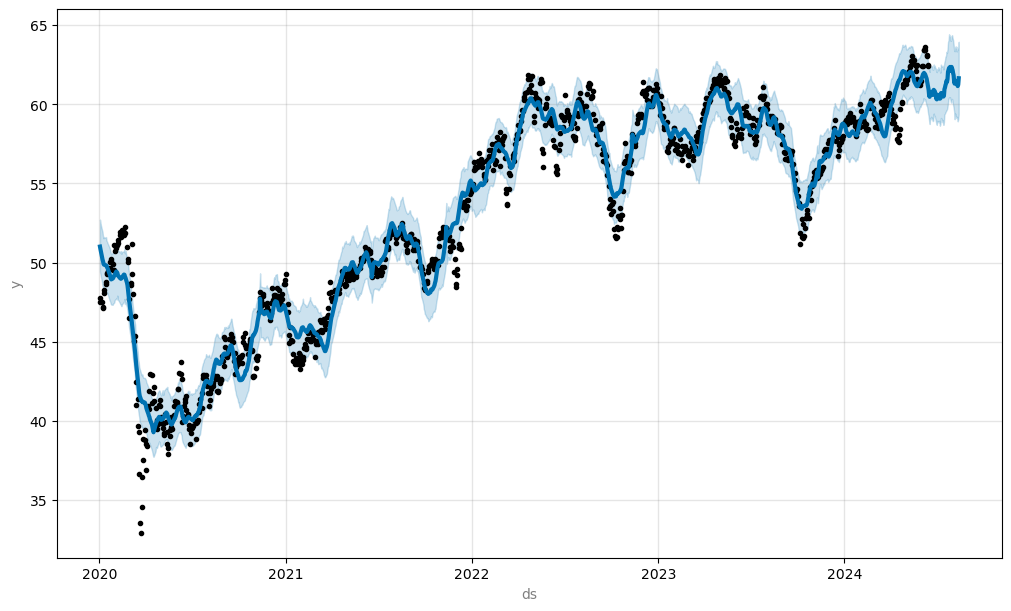

In [13]:
fig2 = prophet_test.plot(forecast_test_data)

d:\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


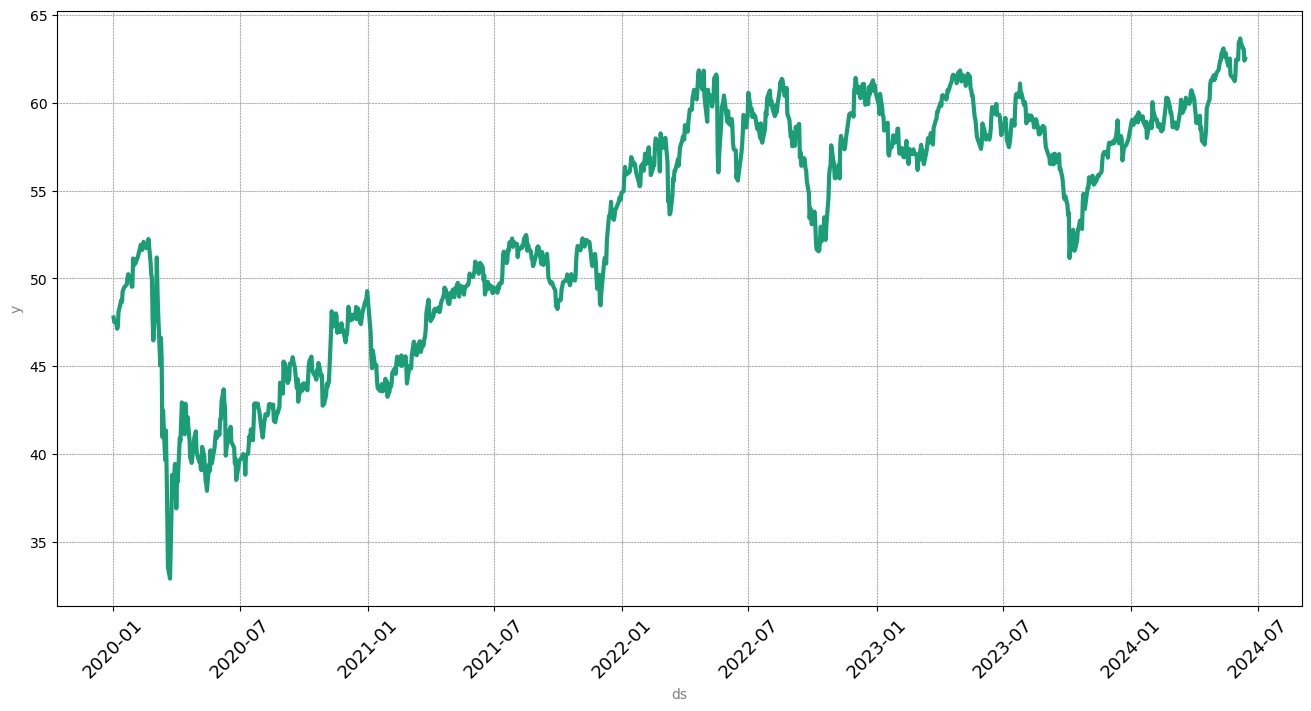

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(13, 7))
sns.lineplot(ax=ax, data=df, x='ds', y='y')
ax.tick_params('x', colors='k', labelrotation=45, labelsize=13)
plt.show()